# Homework #2 -- Daniel Coelho

Instructor: Dr. Alex Krasnok

**1. Compute the *tensor products* of the vectors:**

$\begin{pmatrix} a \\ b \end{pmatrix} \otimes \begin{pmatrix} c \\ d \end{pmatrix}$ 

$\begin{pmatrix} 1 \\ 2 \end{pmatrix} \otimes \begin{pmatrix} 3 \\ 4 \end{pmatrix}$.

For Python solution use _both_ numerical (NumPy) and symbolic (SymPy) libraries.

*Your Python solution*

In [10]:
import numpy as np
from sympy import *

# Numerical tensor product
vector1_num = np.array([1, 2])
vector2_num = np.array([3, 4])

tensor_product_num = np.outer(vector1_num, vector2_num)
print("Numerical tensor product:\n", tensor_product_num)

# Symbolic tensor product
a, b, c, d = symbols('a b c d')
vector1_sym = Matrix([a, b])
vector2_sym = Matrix([c, d])

tensor_product_sym = tensorproduct(vector1_sym, vector2_sym)
print("\nSymbolic tensor product: \n", tensor_product_sym)

Numerical tensor product:
 [[3 4]
 [6 8]]

Symbolic tensor product: 
 [[[[a*c], [a*d]]], [[[b*c], [b*d]]]]


*Your handwritten solution.* 

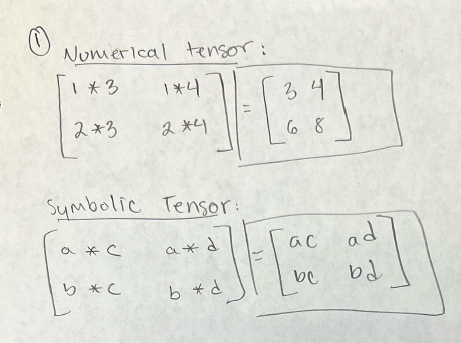

In [31]:
from IPython.display import Image

# Display the image
Image(filename='HW#2 Pictures/1.png')

<br>

**2. Express the complex number $z = 3 + 4i$ in polar and exponential form. Find the absolute value and normalize the vector.**

For Python solution use both numerical (NumPy) and symbolic (SymPy) libraries.

*Your Python solution*

In [32]:
# Numerical solution
z_num = 3 + 4j
r_num = abs(z_num)
theta_num = np.angle(z_num)
z_polar_num = round(r_num, 3) * (round(np.cos(theta_num), 3) + round(np.sin(theta_num), 3) * 1j)
z_exponential_num = round(r_num, 3) * np.exp(1j * theta_num)
normalized_z_num = z_num / r_num
normalized_z_num = round(normalized_z_num.real, 3) + round(normalized_z_num.imag, 3) * 1j

print("Numerical solution:")
print("Polar form:", z_polar_num)
print("Exponential form:", f"{round(r_num, 3)}e^{round(theta_num, 3)}i")
print("Normalized vector:", normalized_z_num)

# Symbolic solution
x, y = symbols('x y', real=True)
z_sym = x + y * I
r_sym = sqrt(x**2 + y**2)
theta_sym = atan2(y, x)
z_polar_sym = r_sym * (cos(theta_sym) + sin(theta_sym) * I)
z_exponential_sym = r_sym * exp(I * theta_sym)
normalized_z_sym = z_sym / r_sym

# Substitute x = 3, y = 4 (Rounded numbers to the third)
z_polar_sym_eval = N(z_polar_sym.subs({x:3, y:4}), 3)
z_exponential_sym_eval = N(z_exponential_sym.subs({x:3, y:4}), 3)
normalized_z_sym_eval = N(normalized_z_sym.subs({x:3, y:4}), 3)

print("\nSymbolic solution (evaluated numerically):")
print("Polar form:", z_polar_sym_eval)
print("Exponential form:", z_exponential_sym_eval)
print("Normalized vector:", normalized_z_sym_eval)

Numerical solution:
Polar form: (3+4j)
Exponential form: 5.0e^0.927i
Normalized vector: (0.6+0.8j)

Symbolic solution (evaluated numerically):
Polar form: 3.0 + 4.0*I
Exponential form: 3.0 + 4.0*I
Normalized vector: 0.6 + 0.8*I


*Your handwritten solution* 

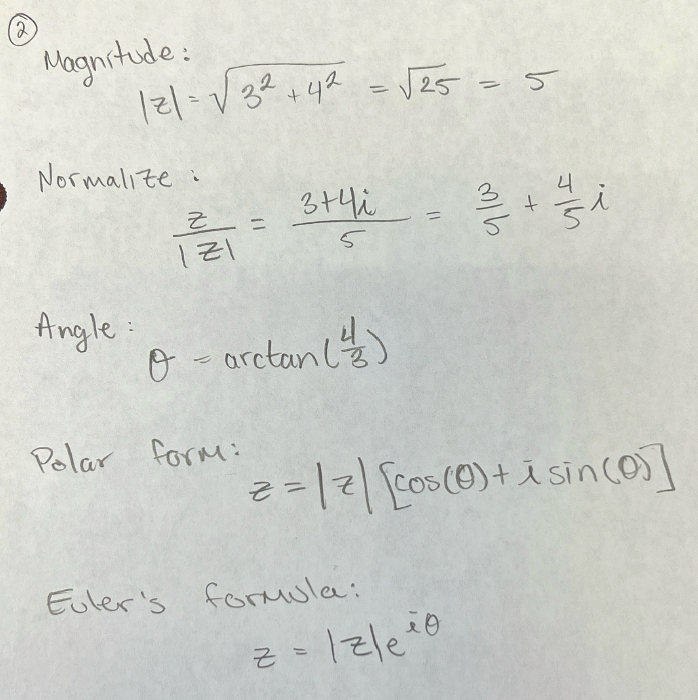

In [33]:
# Display the image
Image(filename='HW#2 Pictures/2.png')

<br>

**3. For the complex vector $\begin{pmatrix} 1 + i \\ 2 - 3i \end{pmatrix}$, compute its conjugate transpose (or adjoint).**

Hint: Conjugate each entry and transpose the vector.

For Python solution use both numerical (NumPy) and symbolic (SymPy) libraries.

*Your Python solution*

In [34]:
vector_num = np.array([1 + 1j, 2 - 3j])
adjoint_num = np.conjugate(np.transpose(vector_num))
print("Numerical adjoint:", adjoint_num)

# Symbolic solution using SymPy
vector_sym = Matrix([[1 + I], [2 - 3*I]])
adjoint_sym = vector_sym.H  # .H is the Hermitian (conjugate transpose)
print("\nSymbolic adjoint:\n", adjoint_sym)

Numerical adjoint: [1.-1.j 2.+3.j]

Symbolic adjoint:
 Matrix([[1 - I, 2 + 3*I]])


*Your handwritten solution* 

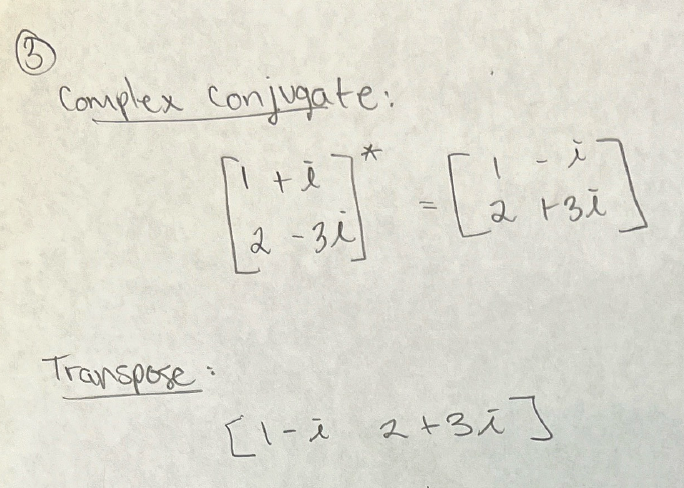

In [35]:
# Display the image
Image(filename='HW#2 Pictures/3.png')

<br>

**4. Using Dirac notation, compute the inner and outer products of $|\psi\rangle = \begin{pmatrix} 2 \\ 3 \end{pmatrix}$ and $|\phi\rangle = \begin{pmatrix} 1 \\ -1 \end{pmatrix}$.**

Hint: The inner product is $\langle\psi|\phi\rangle$ and outer is $|\psi\rangle\langle\phi|$.

For Python solution use SymPy library sympy.physics.quantum (see lecture 4).

*Your Python solution*

In [36]:
from sympy.physics.quantum import Ket, qapply
from sympy import Matrix, pprint

# Define the ket vectors with the given numerical values
ket_psi = Ket('psi')
ket_phi = Ket('phi')
ket_psi = Ket('psi', Matrix([2, 3]))
ket_phi = Ket('phi', Matrix([1, -1]))

# Define the bra vectors as the conjugate transpose (dagger) of the ket vectors
bra_psi = Dagger(ket_psi)
bra_phi = Dagger(ket_phi)

# Compute the inner product
inner_product = qapply(bra_phi * ket_psi)

# Compute the outer product
outer_product = qapply(ket_psi * bra_phi)

# Printing the inner and outer products using IPython's pretty print
print("Inner product:")
pprint(inner_product, use_unicode=True)

print("\nOuter product:")
pprint(outer_product, use_unicode=True)

Inner product:
⟨φ(1, -1)❘ψ(2, 3)⟩

Outer product:
❘ψ(2, 3)⟩⟨φ(1, -1)❘


*Your handwritten solution* 

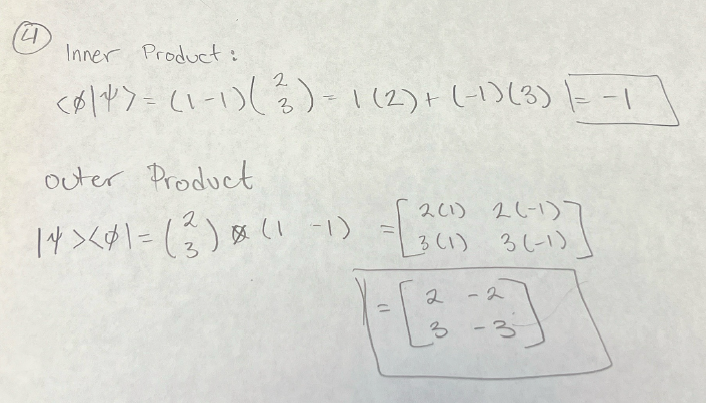

In [37]:
# Display the image
Image(filename='HW#2 Pictures/4.png')

<br>

**5. Given the matrix $\begin{pmatrix} 1 & 2i \\ -2i & 3 \end{pmatrix}$, determine if it’s a Hermitian matrix.**

Hint: Compute its conjugate transpose and compare.

For Python solution use both numerical (NumPy) and symbolic (SymPy) libraries.

*Your Python solution*

In [38]:
import numpy as np

# Define the matrix
matrix_num = np.array([[1, 2j], [-2j, 3]])

# Compute its conjugate transpose (Hermitian adjoint)
conjugate_transpose_num = matrix_num.conjugate().T

# Check if the matrix is Hermitian
is_hermitian_num = np.all(matrix_num == conjugate_transpose_num)

print("Matrix (NumPy):\n", matrix_num)
print("Conjugate transpose (NumPy):\n", conjugate_transpose_num)
print("Is the matrix Hermitian? (NumPy):", is_hermitian_num)


Matrix (NumPy):
 [[ 1.+0.j  0.+2.j]
 [-0.-2.j  3.+0.j]]
Conjugate transpose (NumPy):
 [[ 1.-0.j -0.+2.j]
 [ 0.-2.j  3.-0.j]]
Is the matrix Hermitian? (NumPy): True


In [39]:
from sympy import Matrix, I

# Define the matrix
matrix_sym = Matrix([[1, 2*I], [-2*I, 3]])

# Compute its conjugate transpose (Hermitian adjoint)
conjugate_transpose_sym = matrix_sym.H

# Check if the matrix is Hermitian
is_hermitian_sym = matrix_sym == conjugate_transpose_sym

print("Matrix (SymPy):\n", matrix_sym)
print("Conjugate transpose (SymPy):\n", conjugate_transpose_sym)
print("Is the matrix Hermitian? (SymPy):", is_hermitian_sym)

Matrix (SymPy):
 Matrix([[1, 2*I], [-2*I, 3]])
Conjugate transpose (SymPy):
 Matrix([[1, 2*I], [-2*I, 3]])
Is the matrix Hermitian? (SymPy): True


*Your handwritten solution* 

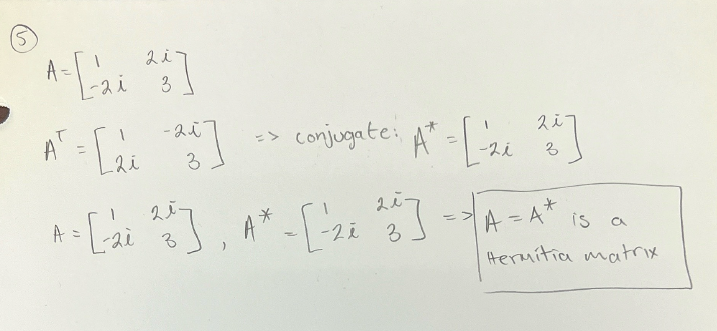

In [40]:
# Display the image
Image(filename='HW#2 Pictures/5.png')

<br>

**6. Represent the action of a matrix $\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$ on a vector $|\phi\rangle = \begin{pmatrix} a \\ b \end{pmatrix}$.**

Hint: The action of the matrix on the vector is given by $M |\phi\rangle$.

For Python solution use symbolic (SymPy) library.


In [41]:
from sympy import symbols, Matrix

# Define the symbols
a, b = symbols('a b')

# Define the vector |ϕ⟩
phi = Matrix([a, b])

# Define the matrix M
M = Matrix([[1, 0], [0, -1]])

# Perform the action of the matrix on the vector
result = M * phi

print("The action of the matrix on the vector:\n", result)

The action of the matrix on the vector:
 Matrix([[a], [-b]])


*Your Python solution*

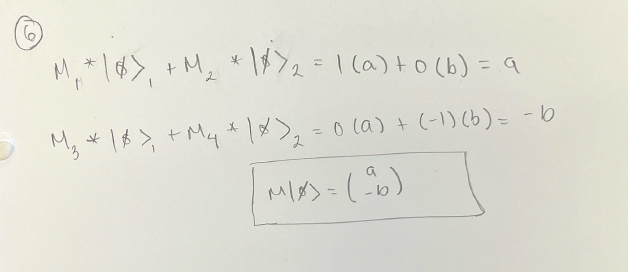

In [42]:
# Display the image
Image(filename='HW#2 Pictures/6.png')

*Your handwritten solution* 

<br>

**7. Express the following matrices in terms of outer products of basis vectors $\{0,1\}$.**

\begin{align}
I = \begin{pmatrix} 1&0 \\ 0&1 \end{pmatrix}, \quad
X = \begin{pmatrix} 0&1 \\ 1&0 \end{pmatrix}, \quad
Y = \begin{pmatrix} 0&i \\ -i&0 \end{pmatrix}, \quad
Z = \begin{pmatrix} 1&0 \\ 0&-1 \end{pmatrix}, \quad
H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1&1 \\ 1&-1 \end{pmatrix}, \quad 
T = \begin{pmatrix}1 & 0\\0 & e^{i \pi/4}\end{pmatrix}. 
\end{align}



*Your handwritten solution* 

<br>

**8. Using NumPy and SymPy, prove that all matrices in Problem #7 are unitary.**


*Your Python solution*

<br>

**9. Using SymPy, prove that the generator matrix $U(\theta, \phi, \lambda)$ is unitary**

$U(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}$
    
The parameters $\theta, \phi, \lambda$ are real-valued.  

*Your Python solution*

<br>

**10. Using NumPy, prove that the operators $I, X, Y, Z, H, T$ are connected through the following properties:**

* $X^2=Y^2=Z^2=I$

* $H = \frac{1}{2}(X + Z)$

* $X = HZH$

*Your Python solution*

*Your handwritten solution.* 

<br>

**11. Using NumPy, find eigenstates and eigenvalues of operators $I, X, Y, Z, H, T$**

*Your Python solution*